In [1]:
%matplotlib notebook
from QDP import qdp
import os.path
import numpy as np
from scipy.stats import poisson
import h5py
import matplotlib.pyplot as plt
from scipy.optimize import leastsq,curve_fit

In [2]:

dp = '/Volumes/E/Rb/Data'
exp_name = '2018_02_01_00_22_16_Microwave Ramsey with Ryd780A, parked at r1-r2'
exp_date = '_'.join(exp_name.split('_')[:3])
experiment_file = os.path.join(exp_date, exp_name, 'results.hdf5')
# # print experiment_file
# #h5py.File('/Volumes/E/Rb/Data/2018_01_29/2018_01_29_13_23_53_2D MOT freq scan/results.hdf5')
# h5py.File('/Volumes/E/Rb/Data/2018_01_29/2018_01_29_13_23_53_2D MOT freq scan/results.hdf5')
cuts = [[450],[450],[450]]

q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
for r in range(5):
    q.set_thresholds(cuts, roi=r)

In [3]:
# dp = '/Users/ChrisYoung/Desktop/qdp-master/bin'
# # exp_name = '2018_01_29_13_23_53_2D MOT freq scan'
# # exp_date = '_'.join(exp_name.split('_')[:3])
# experiment_file = 'results.hdf5'
# # print experiment_file
# #h5py.File('/Volumes/E/Rb/Data/2018_01_29/2018_01_29_13_23_53_2D MOT freq scan/results.hdf5')
# #h5py.File('/Volumes/E/Rb/Data/2018_01_29/2018_01_29_13_23_53_2D MOT freq scan/results.hdf5')
# cuts = [[0],[0],[0]]

# q = qdp.QDP(base_data_path=dp)
# q.load_data_file(experiment_file)
# q.set_thresholds(cuts)

In [3]:
q.experiments[0]['variable_list']
xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']

In [4]:
q.get_thresholds()

{0: [[450], [450], [450]],
 1: [[450], [450], [450]],
 2: [[450], [450], [450]],
 3: [[450], [450], [450]],
 4: [[450], [450], [450]]}

In [5]:
retention = q.apply_thresholds()

5
(203, 3, 1, 5)
[[[ 0.46428571  0.68571429  0.86885246  0.63414634  0.30434783]
  [ 0.24137931  0.6969697   0.8852459   0.78571429  0.4       ]
  [ 0.29577465  0.8245614   0.50819672  0.72222222  0.26666667]
  [ 0.26923077  0.28571429  0.19672131  0.71428571  0.52631579]
  [ 0.26315789  0.14736842  0.47540984  0.71428571  0.41666667]
  [ 0.1969697   0.32142857  0.73770492  0.6         0.46666667]
  [ 0.22641509  0.55905512  0.7         0.6875      0.21428571]
  [ 0.31343284  0.72727273  0.43333333  0.83673469  0.37777778]
  [ 0.24528302  0.35227273  0.35        0.69565217  0.30769231]
  [ 0.19607843  0.3190184   0.53333333  0.76470588  0.5       ]
  [ 0.18681319  0.62        0.8         0.55263158  0.3125    ]
  [ 0.27777778  0.66115702  0.83333333  0.7         0.25581395]
  [ 0.21917808  0.82222222  0.40983607  0.58823529  0.28571429]
  [ 0.20238095  0.26277372  0.31147541  0.57575758  0.29411765]
  [ 0.13592233  0.23741007  0.70491803  0.60714286  0.17241379]
  [ 0.16129032  0.69178

In [6]:
np.squeeze(retention['retention'])

array([[ 0.46428571,  0.68571429,  0.86885246,  0.63414634,  0.30434783],
       [ 0.24137931,  0.6969697 ,  0.8852459 ,  0.78571429,  0.4       ],
       [ 0.29577465,  0.8245614 ,  0.50819672,  0.72222222,  0.26666667],
       [ 0.26923077,  0.28571429,  0.19672131,  0.71428571,  0.52631579],
       [ 0.26315789,  0.14736842,  0.47540984,  0.71428571,  0.41666667],
       [ 0.1969697 ,  0.32142857,  0.73770492,  0.6       ,  0.46666667],
       [ 0.22641509,  0.55905512,  0.7       ,  0.6875    ,  0.21428571],
       [ 0.31343284,  0.72727273,  0.43333333,  0.83673469,  0.37777778],
       [ 0.24528302,  0.35227273,  0.35      ,  0.69565217,  0.30769231],
       [ 0.19607843,  0.3190184 ,  0.53333333,  0.76470588,  0.5       ],
       [ 0.18681319,  0.62      ,  0.8       ,  0.55263158,  0.3125    ],
       [ 0.27777778,  0.66115702,  0.83333333,  0.7       ,  0.25581395],
       [ 0.21917808,  0.82222222,  0.40983607,  0.58823529,  0.28571429],
       [ 0.20238095,  0.26277372,  0.3

In [7]:
tbl_str = "ivar:\t{0:.2f}\tretention:{1:.3f} +- {2:.3f}"
for i in range(len(retention['retention'].flatten())):
    print(tbl_str.format(
        retention['ivar'].flatten()[i],
        retention['retention'].flatten()[i],
        retention['error'].flatten()[i]
    ))

ivar:	0.00	retention:0.783 +- 0.023
ivar:	0.00	retention:0.858 +- 0.023
ivar:	0.00	retention:0.871 +- 0.023
ivar:	0.00	retention:0.949 +- 0.023
ivar:	0.00	retention:0.950 +- 0.023
ivar:	0.00	retention:0.682 +- 0.026
ivar:	0.00	retention:0.856 +- 0.026
ivar:	0.00	retention:0.857 +- 0.026
ivar:	0.00	retention:0.952 +- 0.026
ivar:	0.00	retention:0.850 +- 0.026
ivar:	0.01	retention:0.796 +- 0.029
ivar:	0.01	retention:0.776 +- 0.029
ivar:	0.01	retention:0.900 +- 0.029
ivar:	0.01	retention:0.931 +- 0.029
ivar:	0.01	retention:0.889 +- 0.029
ivar:	0.01	retention:0.683 +- 0.031
ivar:	0.01	retention:0.712 +- 0.031
ivar:	0.01	retention:0.746 +- 0.031
ivar:	0.01	retention:0.914 +- 0.031
ivar:	0.01	retention:0.700 +- 0.031
ivar:	0.02	retention:0.653 +- 0.031
ivar:	0.02	retention:0.752 +- 0.031
ivar:	0.02	retention:0.671 +- 0.031
ivar:	0.02	retention:0.786 +- 0.031
ivar:	0.02	retention:0.429 +- 0.031
ivar:	0.02	retention:0.581 +- 0.038
ivar:	0.02	retention:0.529 +- 0.038
ivar:	0.02	retention:0.690 +

In [35]:
q.save_experiment_data()

AttributeError: QDP instance has no attribute 'version'

In [7]:
def sin(x,C,F,phi,A):
    res = (C*np.sin((2*np.pi*F*x)+phi)) + A
    return res 
def sin_fit(datax,datay):
    [fit,p] = curve_fit(sin,datax,datay,[0.4,1,-0.19,1])
    return fit

<IPython.core.display.Javascript object>


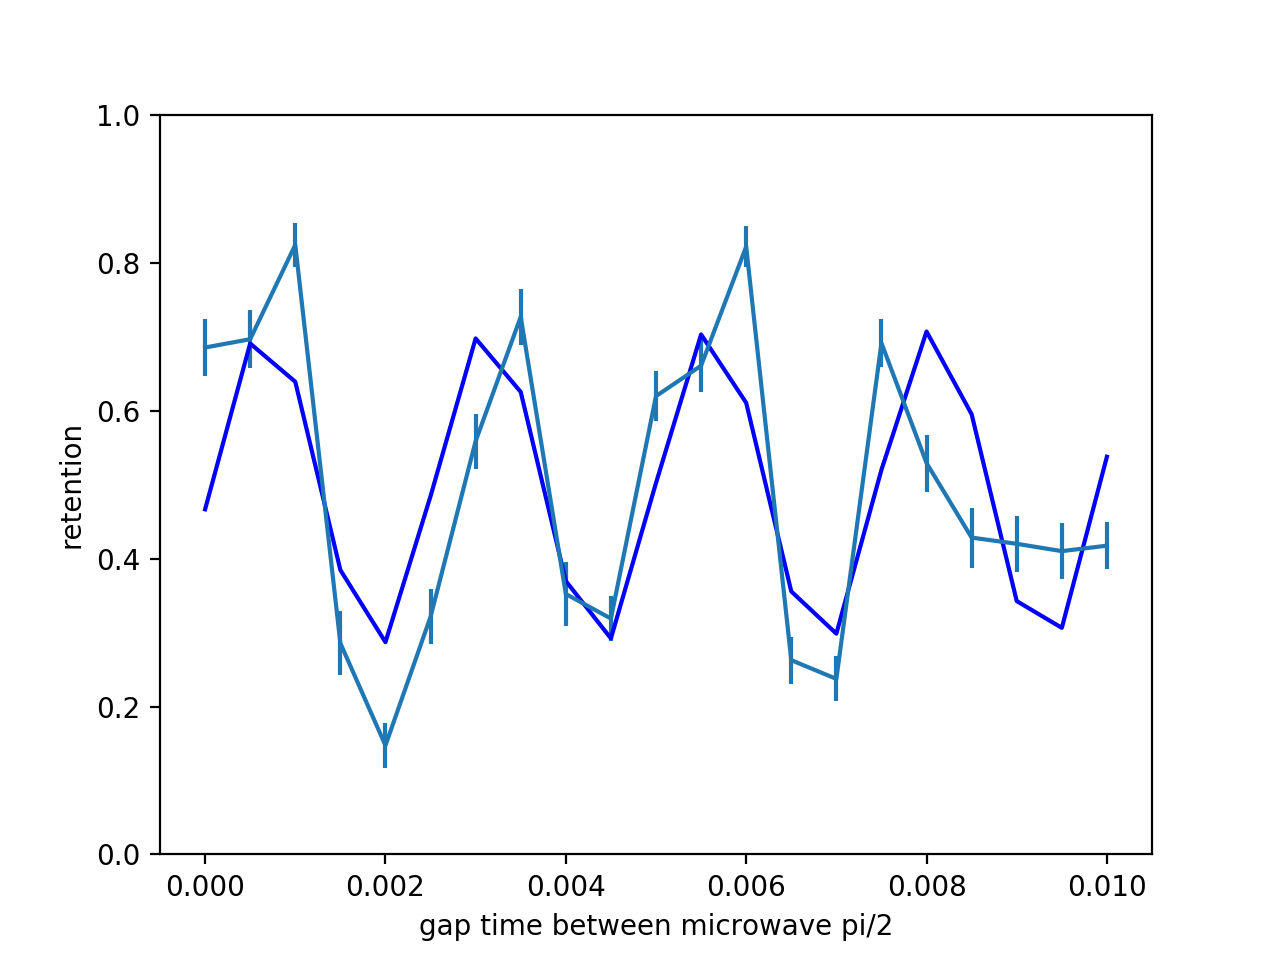

[ -2.15155428e-01   4.05290787e+02   3.00617428e+00   4.95845616e-01]


In [8]:
fig, ax = plt.subplots()
# print np.shape(np.squeeze(retention['error']))
# print np.squeeze(retention['ivar'])[1]
# print np.squeeze(retention['error'])
#print len(np.squeeze(retention['ivar']))
#print np.shape(np.squeeze(retention['ivar']))[1]
# for roi in range(np.shape(np.squeeze(retention['ivar']))[1]):
for roi in range(1,2):
    
    data = []
    reten = []
    err = []
    for e in range(len(np.squeeze(retention['ivar']))):
        data.append(np.squeeze(retention['ivar'])[e][roi])
        reten.append(np.squeeze(retention['retention'])[e][roi])
        err.append(np.squeeze(retention['error'])[e][roi])
   # print reten
    ax.errorbar(data,reten,yerr=err)
    fit = curve_fit(sin,data,reten,[1,500,-0.19,0.5])
    print fit[0]
    wat = []
    for x in range(0, len(data)):
        wat.append( sin(data[x], np.float(fit[0][0]),np.float(fit[0][1]),np.float(fit[0][2]),np.float(fit[0][3])))
    plt.plot(data,wat, c='b' )
    plt.show()
        
#     plt.plot(data,sin(data, fit[0][0],fit[0][1],fit[0][2],fit[0][3]), c='b' )

ax.set_ylim(0, 1)
ax.set_xlabel(xlab)
ax.set_ylabel('retention')

<IPython.core.display.Javascript object>


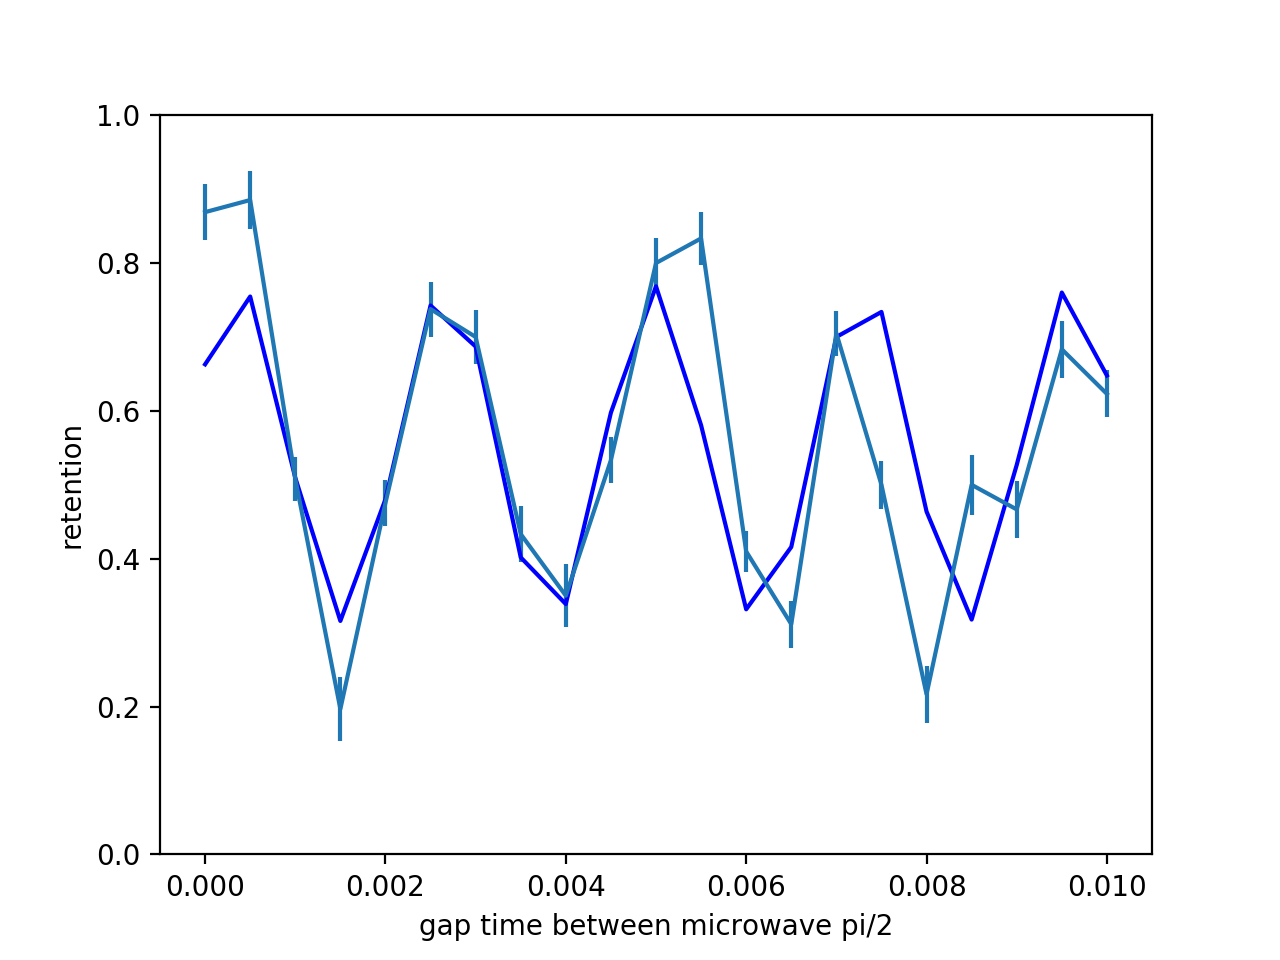

[  2.26667385e-01   4.33312005e+02   5.62678642e-01   5.42021078e-01]


In [9]:
fig, ax = plt.subplots()
# print np.shape(np.squeeze(retention['error']))
# print np.squeeze(retention['ivar'])[1]
# print np.squeeze(retention['error'])
#print len(np.squeeze(retention['ivar']))
#print np.shape(np.squeeze(retention['ivar']))[1]
# for roi in range(np.shape(np.squeeze(retention['ivar']))[1]):
for roi in range(2,3):
    
    data = []
    reten = []
    err = []
    for e in range(len(np.squeeze(retention['ivar']))):
        data.append(np.squeeze(retention['ivar'])[e][roi])
        reten.append(np.squeeze(retention['retention'])[e][roi])
        err.append(np.squeeze(retention['error'])[e][roi])
   # print reten
    ax.errorbar(data,reten,yerr=err)
    fit = curve_fit(sin,data,reten,[1,500,-0.19,0.5])
    print fit[0]
    wat = []
    for x in range(0, len(data)):
        wat.append( sin(data[x], np.float(fit[0][0]),np.float(fit[0][1]),np.float(fit[0][2]),np.float(fit[0][3])))
    plt.plot(data,wat, c='b' )
    plt.show()
        
#     plt.plot(data,sin(data, fit[0][0],fit[0][1],fit[0][2],fit[0][3]), c='b' )

ax.set_ylim(0, 1)
ax.set_xlabel(xlab)
ax.set_ylabel('retention')

<IPython.core.display.Javascript object>


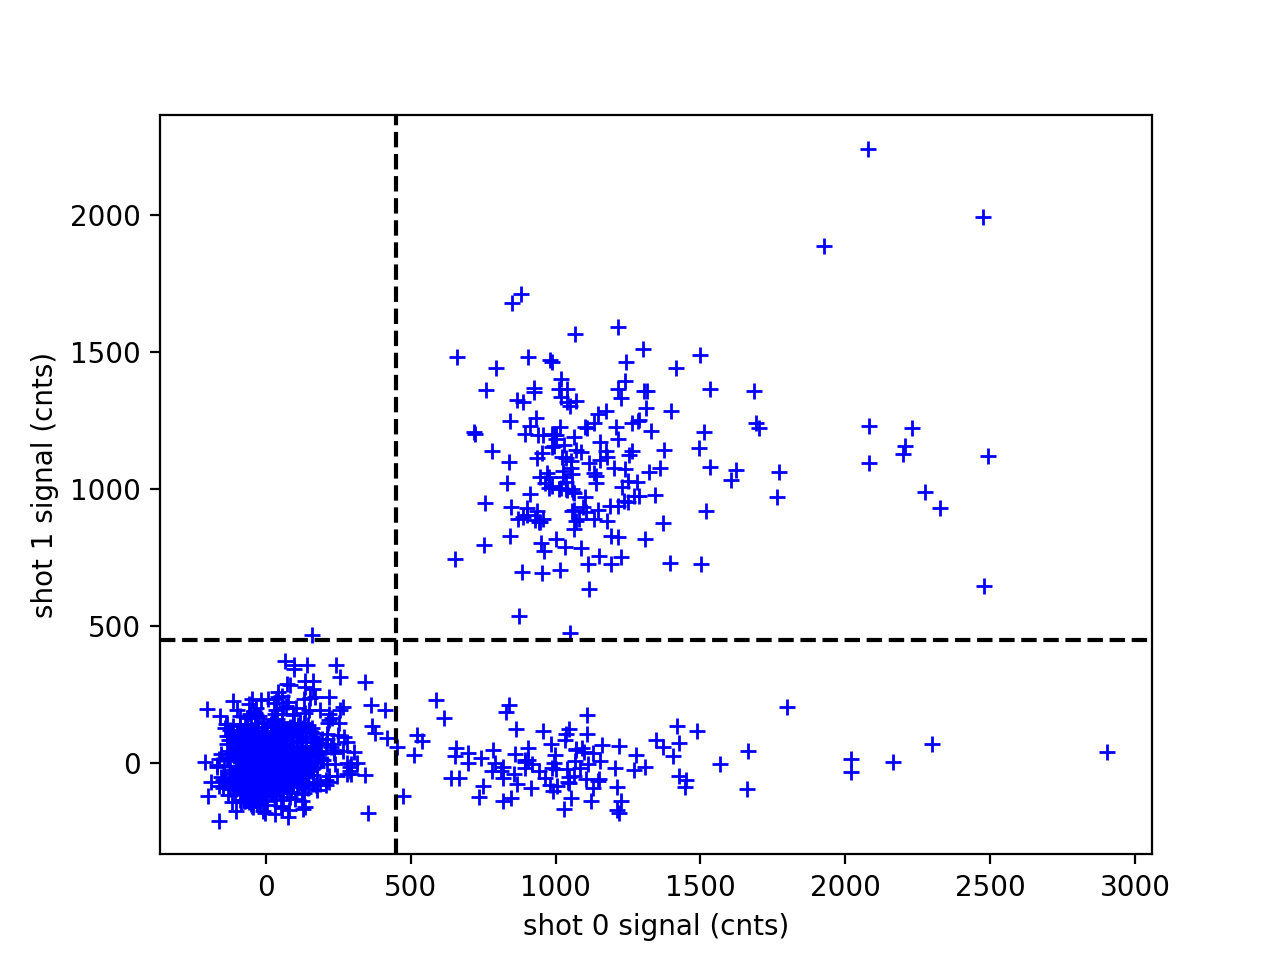

In [10]:
itr = 0*(len(np.squeeze(retention['ivar'])[e])-1)
fig, ax = plt.subplots()
s0_data = np.squeeze(q.experiments[0]['iterations'][itr]['signal_data'])[:,0]
s1_data = np.squeeze(q.experiments[0]['iterations'][itr]['signal_data'])[:,1]

ax.plot(s0_data, s1_data, 'b+')

for xc in cuts[0]:
    plt.axvline(x=xc, color='k', linestyle='--')
for xc in cuts[1]:
    plt.axhline(y=xc, color='k', linestyle='--')

ax.set_xlabel('shot 0 signal (cnts)')
ax.set_ylabel('shot 1 signal (cnts)')